In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
vals = pd.read_csv(r"D:\Tensile Test\Tube_axial_angular_direction\AllData_tubes.csv")

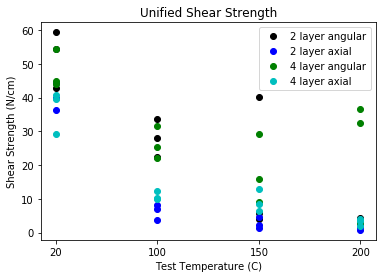

In [39]:
fkey = ['2_ang', '2_axi', '4_ang', '4_axi']
legnd = ['2 layer angular', '2 layer axial', '4 layer angular', '4 layer axial']

clors = ['k', 'b', 'g', 'c']

for i in range(4):
    subdata = vals.loc[vals['configuration']==fkey[i]]

    X = subdata['temperature (C)'].values
    X = list(str(e) for e in X)
    Y = subdata['stress'].values
    if i>=2:
        Y = Y/2
    plt.plot(X, Y, 'o'+clors[i], label = legnd[i])
    
plt.title('Unified Shear Strength')
plt.xlabel("Test Temperature (C)")
plt.ylabel("Shear Strength (N/cm)")
plt.legend()

fname = 'D:\Tensile Test\Tube_axial_angular_direction\\'+ 'Ulayer'+'.jpg'
plt.savefig(fname, format = 'jpg', dpi = 500 )
plt.show()

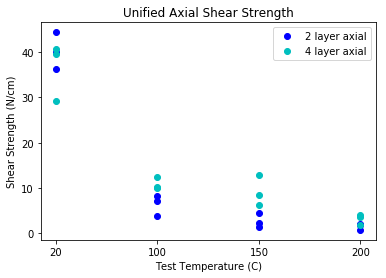

In [40]:
fkey = ['2_axi',  '4_axi']
legnd = ['2 layer axial', '4 layer axial']

clors = [ 'b', 'c']

for i in range(2):
    subdata = vals.loc[vals['configuration']==fkey[i]]

    X = subdata['temperature (C)'].values
    X = list(str(e) for e in X)
    Y = subdata['stress'].values
    if i>=1:
        Y = Y/2
    plt.plot(X, Y, 'o'+clors[i], label = legnd[i])
    
plt.title('Unified Axial Shear Strength')
plt.xlabel("Test Temperature (C)")
plt.ylabel("Shear Strength (N/cm)")
plt.legend()

fname = 'D:\Tensile Test\Tube_axial_angular_direction\\'+ 'UUlayer'+'.jpg'
plt.savefig(fname, format = 'jpg', dpi = 500 )
plt.show()

In [ ]:
fkey = 'ad_peel'

subdata = vals.loc[vals['configuration'==fkey]]

X = ['22', '100', '150', '200']
Y = []
for i in X:
    Y.append(subdata[])


clors = ['k', 'g', 'b', 'c']
linsty = ['--o', '-.o', ':o', '-o']
# peel strength avg values
j = 0
# fig = plt.figure(figsize= (14,6))
for T in Temps:
    inds_T = [i for i in  range(len(Peel_str)) if Peel_str[i][1]==T]

    X = [cvtnm[Peel_str[i][0]] for i in inds_T]
    Y = [Peel_str[i][2] for i in inds_T] 
    c = [round((Peel_str[i][3] - Peel_str[i][4])/2,2) for i in inds_T]
    if T == '150C':
        X = X[1:]
        Y = Y[1:]
        c = c[1:]
#     plt.plot(X,Y, linsty[j], color = clors[j], label = ('Temp = ' + T[:-1] +'$^\circ C$'))
    plt.errorbar(X,Y, yerr = c, linestyle = linsty[j][:-1], fmt ='-o'+clors[j],ecolor= clors[j], 
             mfc = clors[j],capsize= 5, label = ('Temp = ' + T[:-1] +'$^\circ C$'))
    j = j + 1
plt.axhline(y = 3.9, color='r', linestyle='-',label = 'Proposal')
# plt.axhline(y = y_calib/1.5, color='y', linestyle='--',label = 'calibration er')

# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
plt.xlabel("Test Type")
plt.ylabel("Peel Strength (N/cm)")
plt.title(" Peel Strength of Adhesion ")  
plt.legend(fontsize = 8, loc = 1)
#saving figure
fname = root_dirc +"\\Peel_str"+ ".jpg"
plt.savefig(fname, format = 'jpg', dpi = 500 )
plt.show()  

    
# Shear T in Temps:
j = 0
# fig = plt.figure(figsize= (14,6))
for T in Temps:
    inds_T = [i for i in  range(len(Shear_str)) if Shear_str[i][1]==T]
    
    X = [cvtnm[Shear_str[i][0]] for i in inds_T]
    Y = [Shear_str[i][2] for i in inds_T] 
    c = [round((Shear_str[i][3] - Shear_str[i][4])/2,2) for i in inds_T]
#     plt.plot(X,Y, linsty[j], color = clors[j], label = ('Temp = ' + T[:-1] + '$^\circ C$'))
    plt.errorbar(X,Y, yerr = c, linestyle = linsty[j][:-1], fmt ='-o'+clors[j],ecolor= clors[j], 
                 mfc = clors[j], capsize= 5, label = ('Temp = ' + T[:-1] +'$^\circ C$'))
    
    j = j + 1
    
# plt.axhline(y=1, color='r', linestyle='-', label = '1Mpa')  
# plt.axhline(y = y_calib/(1.5*2.54*100), color='y', linestyle='--',label = 'calibration er')
# plt.xticks(fontsize = 15)
# plt.yticks(fontsize = 15)
plt.ylim([0, 0.7])
plt.xlabel("Test Type")
plt.ylabel("Max Shear Strength (MPa)")
plt.title(" Shear Strength of Adhesion")  
plt.legend(fontsize = 8, loc = 1)
#saving figure
fname = root_dirc +"\\Shear_str"+ ".jpg"
plt.savefig(fname, format = 'jpg', dpi = 500 )
plt.show()   

### Plot the data for adhesive 4538 and 7050

In [2]:
## plot the data for adhesive 4538 and 7050
vals = pd.read_csv(r"D:\Tensile Test\9_3_2019\output.csv")

In [3]:
import os
os.chdir(r"D:\Tensile Test\9_3_2019")

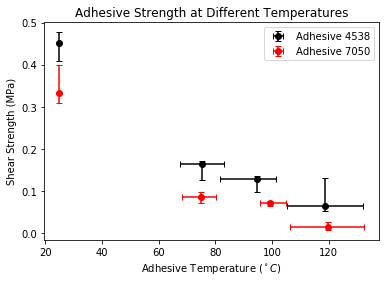

In [21]:
fkey = [4538, 7050]
legnd = ['Adhesive 4538', 'Adhesive 7050']
temps = [25, 200, 300, 400]

clors = ['k', 'r']

for i in range(2):
    subdata = vals.loc[vals['Type']==fkey[i]]
    X_err1 = []
    X_err2 = []
    X_avr = []
    Y_err1 = []
    Y_err2 = []
    Y_avr = []
    for tp in temps:
        subsubd = subdata.loc[subdata['Temp']==tp]
        x_f = subsubd['Front Temp'].values
        x_b = subsubd['Back Temp'].values
        x_avr = (x_f+x_b)/2
        x_err1_mid = (x_avr+x_b)/2
        x_err2_mid = (x_f+x_avr)/2
        
        X_err1.append(x_avr.mean()-x_err1_mid.min())
        X_err2.append(x_err2_mid.max()-x_avr.mean())
        X_avr.append(x_avr.mean())
        
        
        y_x = subsubd['Stress(MPa)'].max()
        y_n = subsubd['Stress(MPa)'].min()
        y_avr = subsubd['Stress(MPa)'].sum()-y_x-y_n
 
        Y_err1.append(y_avr-y_n)
        Y_err2.append(y_x-y_avr)
        Y_avr.append(y_avr)
        
#     X_f = subdata['Front Temp'].values
#     X_b = subdata['Back Temp'].values
#     X_avr = (X_f+X_b)/2
#     X_err2 = X_f - X_avr
#     X_err1 = X_avr - X_b
    X_errs = [X_err1,X_err2]
    Y_errs = [Y_err1,Y_err2]
    
#     X = list(str(e) for e in X)
#     Y = subdata['Stress(MPa)'].values

    plt.errorbar(X_avr, Y_avr, yerr= Y_errs, xerr = X_errs,
                 fmt ='o'+clors[i], 
                 label = legnd[i], capsize = 3)
    
#     plt.plot(X, Y, 'o'+clors[i], label = legnd[i])
    
plt.title('Adhesive Strength at Different Temperatures')
plt.xlabel("Adhesive Temperature ($ ^\circ C$)")
plt.ylabel("Shear Strength (MPa)")
plt.legend()

# fname =  'ad.jpg'
# plt.savefig(fname, format = 'jpg', dpi = 500 )
plt.show()

k_c = 386W/(m.K)
k_k = 0.12W/(m.K)

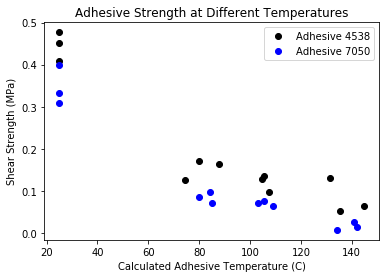

In [10]:
R = 0.12/386

fkey = [4538, 7050]
legnd = ['Adhesive 4538', 'Adhesive 7050']

clors = ['k', 'b']

for i in range(2):
    subdata = vals.loc[vals['Type']==fkey[i]]

    X1 = subdata['Front Temp'].values
    X2 = subdata['Back Temp'].values
    X = (X1+R*X2)/(1+R)
#     X = list(str(e) for e in X)
    Y = subdata['Stress(MPa)'].values

    plt.plot(X, Y, 'o'+clors[i], label = legnd[i])
    
plt.title('Adhesive Strength at Different Temperatures')
plt.xlabel("Calculated Adhesive Temperature (C)")
plt.ylabel("Shear Strength (MPa)")
plt.legend()

fname = 'calT.jpg'
plt.savefig(fname, format = 'jpg', dpi = 500 )
plt.show()

In [ ]:
plt.errorbar(avr.index, avr.values, yerr= std.values, linestyle =linsty[i][:-1],
                 fmt ='-o'+clrs[i],ecolor=clrs[i], mfc = clrs[i], 
                 label = str(amp[i]) + ' microns', capsize = 3)